In [20]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('C:\\Users\\divya\\OneDrive\\Desktop\\HealthCareApp\\HealthCareApp\\Data\\filter-kidney.csv')
df

,Unnamed: 0,id,age,bp,al,pcc,bgr,bu,sc,hemo,pcv,htn,dm,appet,class
0,0,0,48.0,80.0,1.0,notpresent,121.0,36.0,1.2,15.4,44,yes,yes,good,Chronic
1,1,1,7.0,50.0,4.0,notpresent,121.0,18.0,0.8,11.3,38,no,no,good,Chronic
2,2,2,62.0,80.0,2.0,notpresent,423.0,53.0,1.8,9.6,31,no,yes,poor,Chronic
3,3,3,48.0,70.0,4.0,present,117.0,56.0,3.8,11.2,32,yes,no,poor,Chronic
4,4,4,51.0,80.0,2.0,notpresent,106.0,26.0,1.4,11.6,35,no,no,good,Chronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,395,55.0,80.0,0.0,notpresent,140.0,49.0,0.5,15.7,47,no,no,good,Non-Chronic
396,396,396,42.0,70.0,0.0,notpresent,75.0,31.0,1.2,16.5,54,no,no,good,Non-Chronic
397,397,397,12.0,80.0,0.0,notpresent,100.0,26.0,0.6,15.8,49,no,no,good,Non-Chronic
398,398,398,17.0,60.0,0.0,notpresent,114.0,50.0,1.0,14.2,51,no,no,good,Non-Chronic


In [22]:
df['pcc'] = df['pcc'].replace(to_replace={'present':1.0,'present\t':1.0,'notpresent':0.0,'no':0.0})
df['class'] = df['class'].replace(to_replace={'Chronic':1.0,'Chronic\t':1.0,'Non-Chronic':0.0,'no':0.0})
df['htn'] = df['htn'].replace(to_replace={'yes':1.0,'yes\t':1.0,'no':0.0,'no':0.0})
df['dm'] = df['dm'].replace(to_replace={'yes':1.0,'yes\t':1.0,'no':0.0,'no':0.0})
df['appet'] = df['appet'].replace(to_replace={'good':1.0, 'good\t':1.0, 'poor': 0.0, 'poor\n': 0.0})
df

,Unnamed: 0,id,age,bp,al,pcc,bgr,bu,sc,hemo,pcv,htn,dm,appet,class
0,0,0,48.0,80.0,1.0,0.0,121.0,36.0,1.2,15.4,44,1.0,1.0,1.0,1.0
1,1,1,7.0,50.0,4.0,0.0,121.0,18.0,0.8,11.3,38,0.0,0.0,1.0,1.0
2,2,2,62.0,80.0,2.0,0.0,423.0,53.0,1.8,9.6,31,0.0,1.0,0.0,1.0
3,3,3,48.0,70.0,4.0,1.0,117.0,56.0,3.8,11.2,32,1.0,0.0,0.0,1.0
4,4,4,51.0,80.0,2.0,0.0,106.0,26.0,1.4,11.6,35,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,395,55.0,80.0,0.0,0.0,140.0,49.0,0.5,15.7,47,0.0,0.0,1.0,0.0
396,396,396,42.0,70.0,0.0,0.0,75.0,31.0,1.2,16.5,54,0.0,0.0,1.0,0.0
397,397,397,12.0,80.0,0.0,0.0,100.0,26.0,0.6,15.8,49,0.0,0.0,1.0,0.0
398,398,398,17.0,60.0,0.0,0.0,114.0,50.0,1.0,14.2,51,0.0,0.0,1.0,0.0


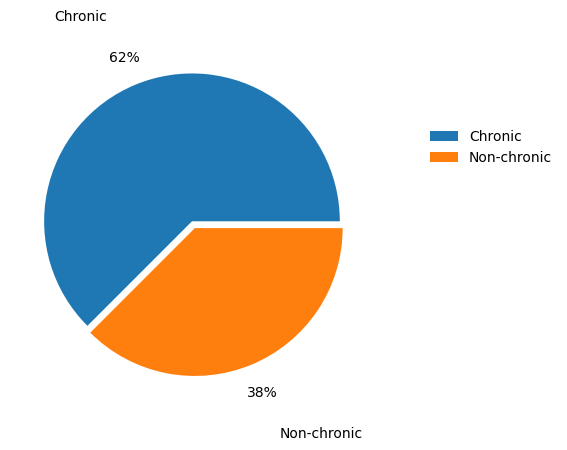

In [23]:
fig, ax = plt.subplots()

labels = ['Chronic', 
         'Non-chronic']
percentages = [62.5, 37.5]
explode=(0.05,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.5)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [24]:
X = df.drop(['class', 'id','Unnamed: 0'], axis=1)
y = df['class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , stratify=y, random_state=1)
print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(320, 12), y:(320,)
Shape test set: X:(80, 12), y:(80,)


In [26]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    """
    A function that returns the score of every evaluation metrics
    """
    if train == True:
        pred = model.predict(x_train_std)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_train, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    if train == False:
        pred = model.predict(x_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_test, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_test, y_test, True)
print()
evaluation(lr, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 98.44%
_______________________________________________
F1 Score: 0.99
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.967480    0.994924  0.984375    0.981202      0.984632
recall       0.991667    0.980000  0.984375    0.985833      0.984375
f1-score     0.979424    0.987406  0.984375    0.983415      0.984412
support    120.000000  200.000000  0.984375  320.000000    320.000000
_______________________________________________
Confusion Matrix: 
 [[119   1]
 [  4 196]]


Test Result:
Accuracy Score: 98.75%
_______________________________________________
F1 Score: 0.99
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy  macro avg  weighted avg
precision   0.967742   1.000000    0.9875   0.983871      0.987903
recall      1.000000   0.980000    0.9875   0.990000      0.987500
f1-score    0.9

In [28]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

evaluation(dtc, X_train, y_train, X_test, y_test, True)
print()
evaluation(dtc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
             0.0    1.0  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    120.0  200.0       1.0      320.0         320.0
_______________________________________________
Confusion Matrix: 
 [[120   0]
 [  0 200]]


Test Result:
Accuracy Score: 98.75%
_______________________________________________
F1 Score: 0.99
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy  macro avg  weighted avg
precision   0.967742   1.000000    0.9875   0.983871      0.987903
recall      1.000000   0.980000    0.9875   0.990000      0.987500
f1-score    0.983607   0.989899    0.9875   0.986753      0.987539
sup

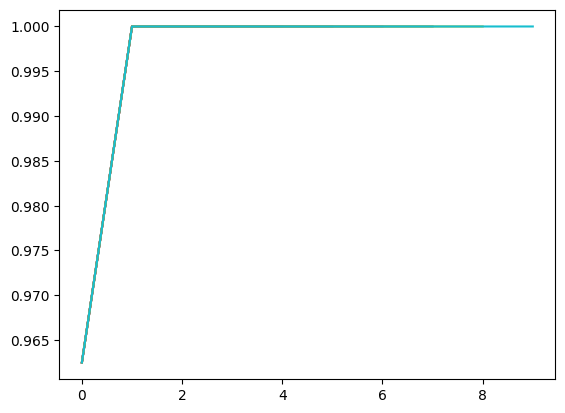

In [29]:
from sklearn.ensemble import RandomForestClassifier
## Finding out the right number of estimators
accuracy_scores = []
for i in range(1, 1000, 100):
    rfc = RandomForestClassifier(n_estimators = i, random_state = 0)
    rfc.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, rfc.predict(X_test)))
    plt.plot(accuracy_scores)

In [30]:
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train, y_train)

evaluation(rfc, X_train, y_train, X_test, y_test, True)
print()
evaluation(rfc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
             0.0    1.0  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    120.0  200.0       1.0      320.0         320.0
_______________________________________________
Confusion Matrix: 
 [[120   0]
 [  0 200]]


Test Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    30.0  50.0       1.0       80.0 

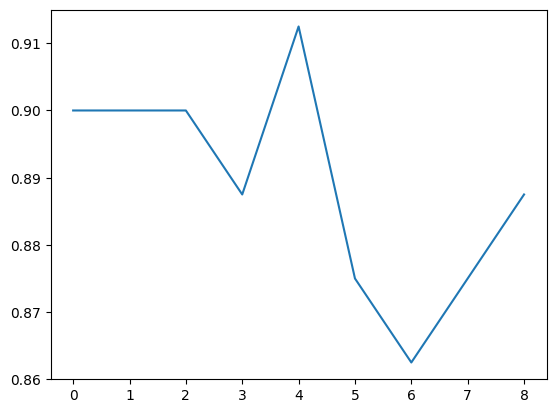

In [31]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(X_test)))
    
plt.plot(accuracy_scores)

In [32]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

evaluation(knn, X_train, y_train, X_test, y_test, True)
evaluation(knn, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 91.56%
_______________________________________________
F1 Score: 0.93
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.816327    1.000000  0.915625    0.908163      0.931122
recall       1.000000    0.865000  0.915625    0.932500      0.915625
f1-score     0.898876    0.927614  0.915625    0.913245      0.916837
support    120.000000  200.000000  0.915625  320.000000    320.000000
_______________________________________________
Confusion Matrix: 
 [[120   0]
 [ 27 173]]

Test Result:
Accuracy Score: 88.75%
_______________________________________________
F1 Score: 0.9
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy  macro avg  weighted avg
precision   0.769231   1.000000    0.8875   0.884615      0.913462
recall      1.000000   0.820000    0.8875   0.910000      0.887500
f1-score    0.869

In [33]:
train_score_lr = round(accuracy_score(y_train, lr.predict(X_train)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test)) * 100, 2)
train_score_rfc = round(accuracy_score(y_train, rfc.predict(X_train)) * 100, 2)
test_score_rfc = round(accuracy_score(y_test, rfc.predict(X_test)) * 100, 2)
train_score_dtc = round(accuracy_score(y_train, dtc.predict(X_train)) * 100, 2)
test_score_dtc = round(accuracy_score(y_test, dtc.predict(X_test)) * 100, 2)
train_score_knn = round(accuracy_score(y_train, knn.predict(X_train)) * 100, 2)
test_score_knn = round(accuracy_score(y_test, knn.predict(X_test)) * 100, 2)

In [34]:
models = {
           'Train Accuracy': [train_score_lr, train_score_dtc, train_score_rfc, train_score_knn],
          'Test Accuracy' : [test_score_lr, test_score_dtc, test_score_rfc, test_score_knn]
         }

models = pd.DataFrame(models, index = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'K-Nearest Neighbor'])
models.head()

,Train Accuracy,Test Accuracy
Logistic Regression,98.44,98.75
Decision Tree Classifier,100.00,98.75
Random Forest Classifier,100.00,100.00
K-Nearest Neighbor,91.56,88.75


In [35]:

y_pred = rfc.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))

clf_report = classification_report(y_test, y_pred)
print('Classification report')
print("---------------------")
print(clf_report)
print("_____________________")

joblib.dump(rfc,r"C:\\Users\\divya\\OneDrive\\Desktop\\HealthCareApp\\HealthCareApp\\kidney api\\kidney.pkl")

Accuracy : 1.0
Classification report
---------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

_____________________


['C:\\\\Users\\\\divya\\\\OneDrive\\\\Desktop\\\\HealthCareApp\\\\HealthCareApp\\\\kidney api\\\\kidney.pkl']

In [36]:
models = {
           'Train Accuracy': [train_score_lr, train_score_dtc, train_score_rfc, train_score_knn],
          'Test Accuracy' : [test_score_lr, test_score_dtc, test_score_rfc, test_score_knn]
         }

models = pd.DataFrame(models, index = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'K-Nearest Neighbor'])
models.head()

,Train Accuracy,Test Accuracy
Logistic Regression,98.44,98.75
Decision Tree Classifier,100.00,98.75
Random Forest Classifier,100.00,100.00
K-Nearest Neighbor,91.56,88.75


In [37]:
X_train.shape

(320, 12)

In [38]:
X_train.columns

Index(['age', 'bp', 'al', 'pcc', 'bgr', 'bu', 'sc', 'hemo', 'pcv', 'htn', 'dm',
       'appet'],
      dtype='object')